# Brainhack School 2023 Final Project
by Wei-Chen Chang(張瑋宸)

## Data Source:
It's from [OpenNeuro](https://openneuro.org/datasets/ds002424/versions/1.2.0/download) and downloaded by datalad.

In the dataset, there're 2x2x2= 8 kinds of tasks implemented to the participants. In the current project, **Verbal working memory, Large reward, Delayed/Immediate reward** (task-VLD or task-VLI) would be our main interest.  
  We first to look at the demographic data of the participants that completed VLD/VLI tasks. 

In [37]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt 
%matplotlib inline
from nilearn import plotting

sub = pd.read_csv('/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/participants.tsv', sep='\t')

sub.groupby(by=["ADHD_diagnosis","sex"]).count() #full sample 

samp = sub[pd.notnull(sub.VLD_datetime) & pd.notnull(sub.VLI_datetime)] #sample w/ VLD and VLI
samp[["participant_id","sex","ADHD_diagnosis"]]
samp.groupby(by=["ADHD_diagnosis","sex"]).count()[["participant_id","VLD_datetime","VLI_datetime"]]

participant_id  VLD_datetime  VLI_datetime
ADHD_diagnosis sex                                            
0              1                28            28            28
               2                14            14            14
1              1                30            30            30

In [16]:
#The behavioral data
#pd.read_csv('/home/wcnoname5/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_events.tsv', sep='\t')

Theere're 72 participants that complete VLD and VLI, 42 of them are control participants and 30 participants with ADHD. 28 out of 42 controls are male, and all 30 ADHD participants are male.  
We save all the participant ID of ADHD participants and male control participants in a seperate array.

In [3]:
ADHD = samp[samp.ADHD_diagnosis==1]['participant_id'].to_numpy()
control_m = samp[(samp.ADHD_diagnosis==0) & (samp.sex==1)]['participant_id'].to_numpy()
print("There're {0} ADHD participants (all were male), ID are {1} respectively.".format(
    len(ADHD), ADHD)
     )
print("There're {0} Control male participants, ID are {1} respectively.".format(
    len(control_m), control_m)
     )

There're 30 ADHD participants (all were male), ID are ['sub-02' 'sub-04' 'sub-05' 'sub-06' 'sub-09' 'sub-10' 'sub-11' 'sub-12'
 'sub-13' 'sub-17' 'sub-24' 'sub-25' 'sub-29' 'sub-30' 'sub-32' 'sub-33'
 'sub-44' 'sub-50' 'sub-54' 'sub-55' 'sub-57' 'sub-66' 'sub-67' 'sub-70'
 'sub-71' 'sub-73' 'sub-74' 'sub-76' 'sub-77' 'sub-79'] respectively.
There're 28 Control male participants, ID are ['sub-03' 'sub-15' 'sub-20' 'sub-31' 'sub-34' 'sub-35' 'sub-36' 'sub-37'
 'sub-38' 'sub-39' 'sub-40' 'sub-43' 'sub-46' 'sub-48' 'sub-51' 'sub-53'
 'sub-56' 'sub-58' 'sub-59' 'sub-60' 'sub-61' 'sub-62' 'sub-63' 'sub-64'
 'sub-65' 'sub-68' 'sub-69' 'sub-72'] respectively.


Since the functional images were raw data, we need to preprocess it. Here we used `fmriprep v23.0.2` implemented with docker, following this [tutorial](https://www.youtube.com/playlist?list=PLIQIswOrUH6_szyxn9Fy-2cxd3vjlklde) to finish the preprocessing. 

# Results

## Sub-02 
Due to time limit and computational limitaions, here we didn't perform a group-level analysis. We only pick one ADHD participant and another control participant to analyze for demonstration.  
For an ADHD participants, we pick `sub-02` for example.
### View Anatomical Images


In [101]:
deriv = os.path.expanduser("~/BHS2023_Project_ADHD/data/ds002424/derivatives/") #read ~ in python
figPath = os.path.expanduser("~/BHS2023_Project_ADHD/result_figs/")
!pwd

/home/wcnoname5/BHS2023_Project_ADHD


**Raw Data**

(256, 256, 160)


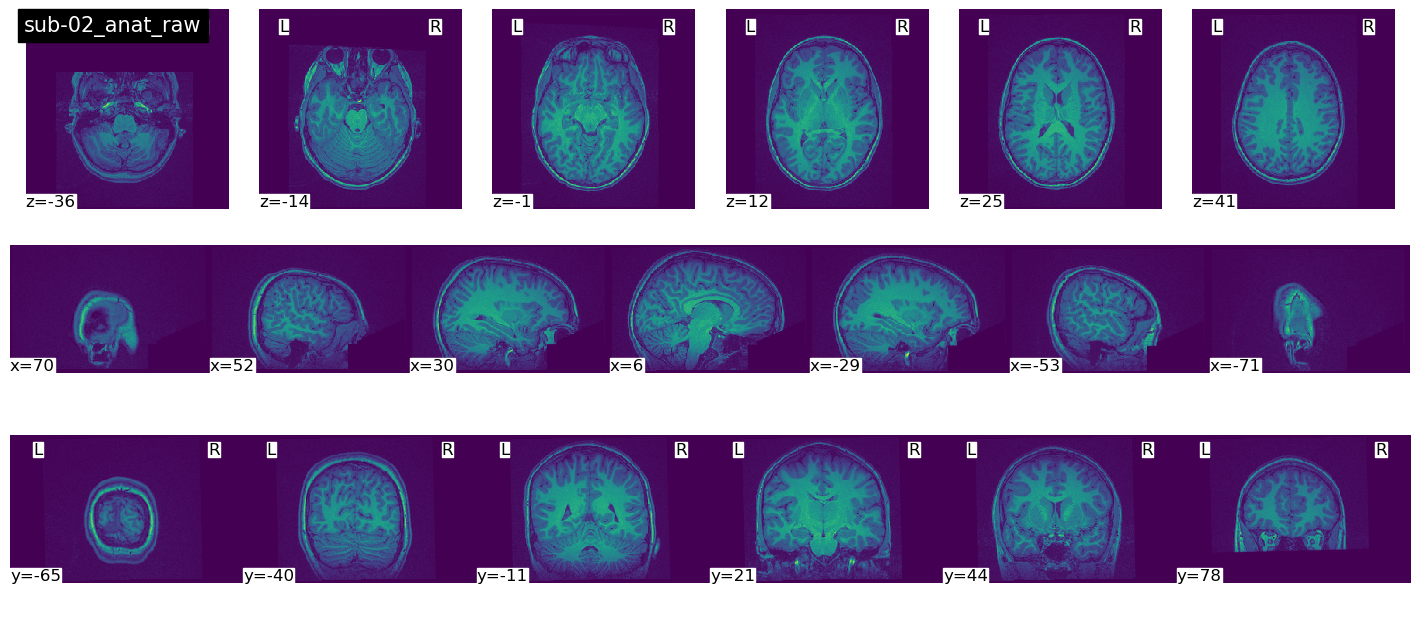

In [150]:
##Check anatomical image
from nilearn import plotting
sub02_anat_r = os.path.expanduser("~/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/anat/sub-02_ses-T1_T1w.nii.gz")
print(nib.load(sub02_anat_r).shape)
fig = plt.figure(figsize=(14,6))
plotting.plot_img(sub02_anat_r, display_mode="mosaic",
                  cut_coords=(7,6,6),
                  title="sub-02_anat_raw", figure=fig
                 ).savefig(figPath+"sub-02_anat_raw_mosiac.png")

#plotting.view_img(sub02_anat_r) #Dynamic

In [63]:
%%bash 
cd ~/BHS2023_Project_ADHD/data/ds002424/derivatives/sub-02/ses-T1/anat/
ls *.nii.gz

sub-02_ses-T1_desc-brain_mask.nii.gz
sub-02_ses-T1_desc-preproc_T1w.nii.gz
sub-02_ses-T1_dseg.nii.gz
sub-02_ses-T1_label-CSF_probseg.nii.gz
sub-02_ses-T1_label-GM_probseg.nii.gz
sub-02_ses-T1_label-WM_probseg.nii.gz
sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz
sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz
sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_dseg.nii.gz
sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_label-CSF_probseg.nii.gz
sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_label-GM_probseg.nii.gz
sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_label-WM_probseg.nii.gz


**After preprocessing, subject space.**

(256, 256, 160)


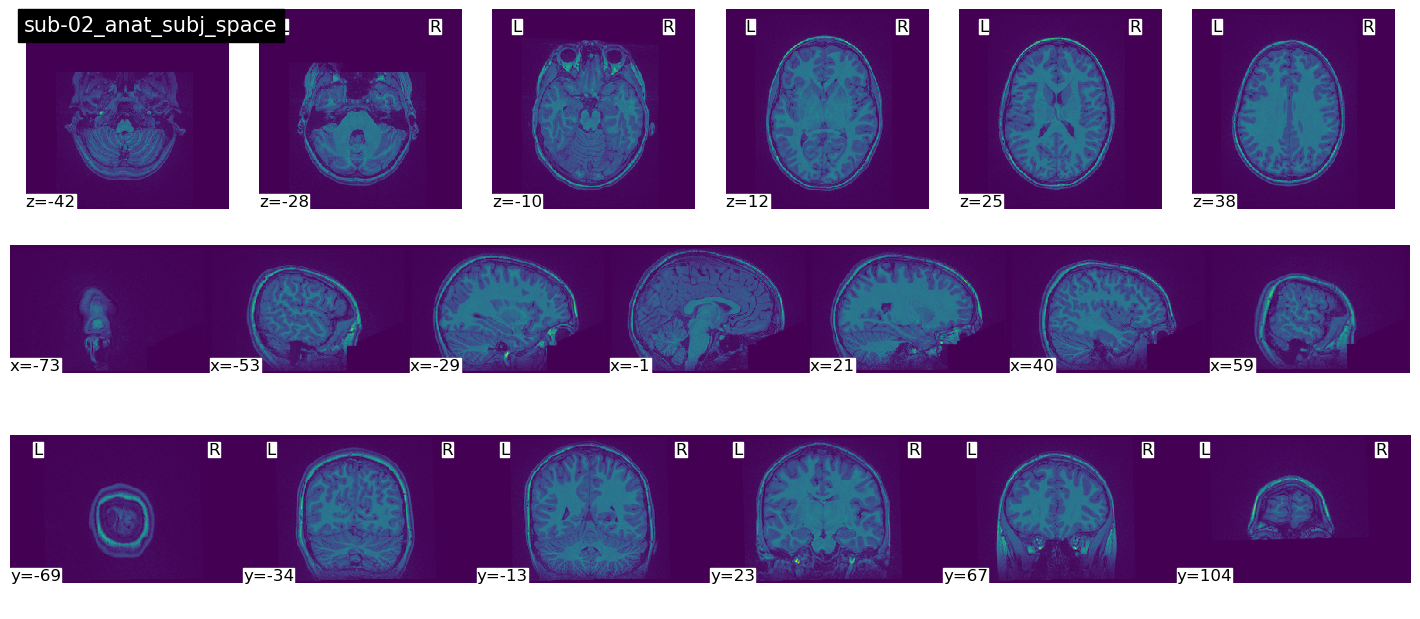

In [137]:
sub02_anat_subj = deriv +"/sub-02/ses-T1/anat/sub-02_ses-T1_desc-preproc_T1w.nii.gz"
print(nib.load(sub02_anat_subj).shape)

fig = plt.figure(figsize=(14,6))
plotting.plot_img(sub02_anat_subj, display_mode="mosaic",
                  cut_coords=(7,6,6), figure=fig,
                  title="sub-02_anat_subj_space") .savefig(figPath+"sub-02_anat_subj_space_mosaic.png")

#plotting.view_img(sub02_anat_subj)

**Normalization to MNI space.**

(97, 115, 97)


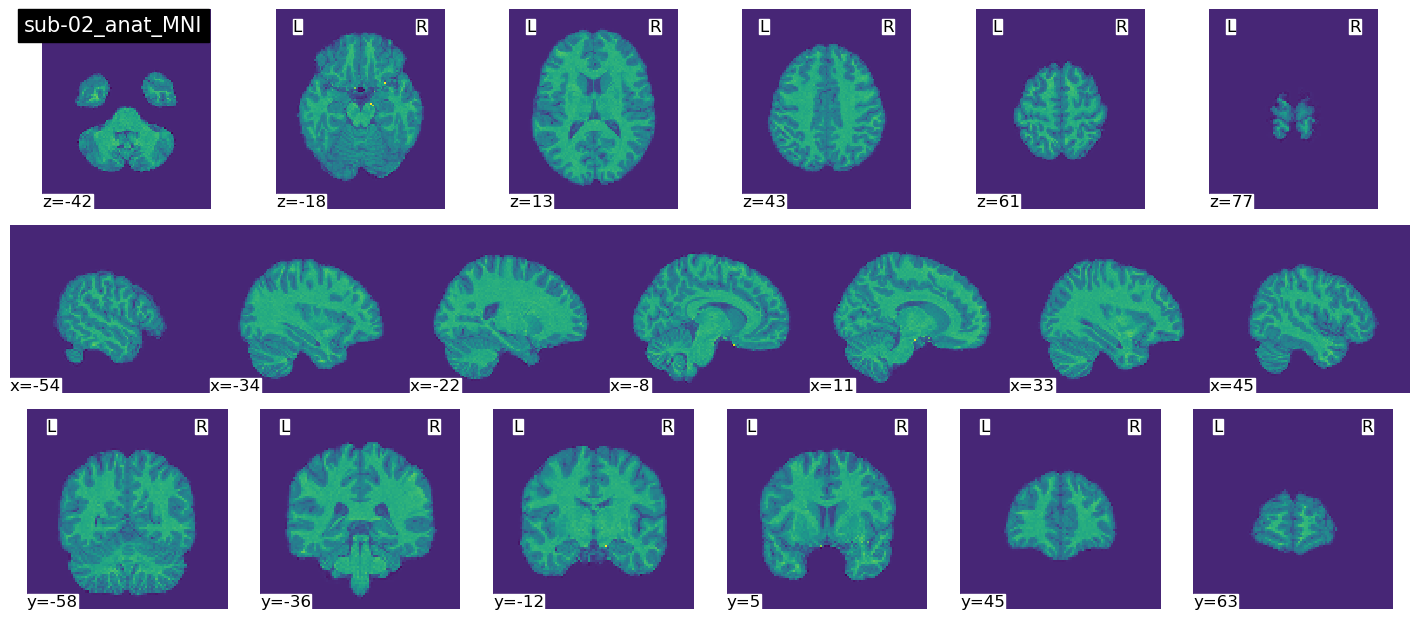

In [140]:
sub02_anat_MNI = deriv+"sub-02/ses-T1/anat/sub-02_ses-T1_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz"
print(nib.load(sub02_anat_MNI).shape)
fig = plt.figure(figsize=(14,6))
plotting.plot_img(sub02_anat_MNI, display_mode="mosaic",
                  cut_coords=(7,6,6), figure=fig,
                  title="sub-02_anat_MNI").savefig(figPath+"sub-02_anat_MNI_mosaic.png")

#plotting.view_img(sub02_anat_MNI)

### View Functional Images
**Raw data**

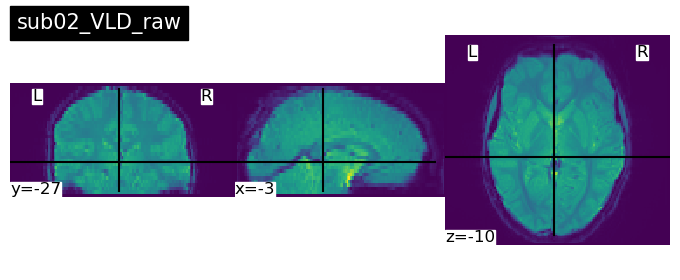

In [116]:
sub02_VLDr = os.path.expanduser(
    "~/BHS2023_Project_ADHD/data/ds002424/sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_bold.nii.gz")
# Since our fmri_img is a 4D NiftiImage, we need to generate a 3D one.
from nilearn.image.image import mean_img

fmri_img_mean = mean_img(sub02_VLDr)

fmri_img_mean.shape
plotting.plot_img(fmri_img_mean,
                 title="sub02_VLD_raw")


#plotting.view_img(fmri_img_mean) #dynamic

**After preprocessing and normalized to MNI space**

(97, 115, 97)

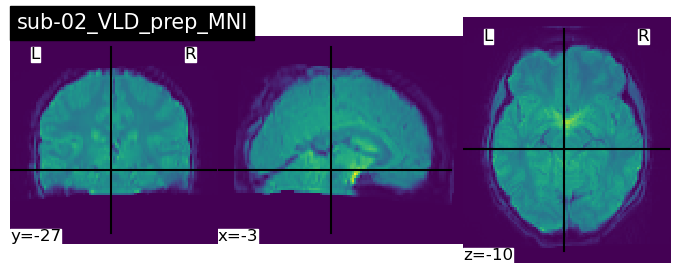

In [71]:
sub02_VLD = deriv+"sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
# Since our fmri_img is a 4D NiftiImage, we need to generate a 3D one.
fmri_img_mean = mean_img(sub02_VLD)
plotting.plot_img(fmri_img_mean,
                  cut_coords = (-3,-27,-10),
                  title = "sub-02_VLD_prep_MNI")
fmri_img_mean.shape

#plotting.view_img(fmri_img_mean)

#### Check the `func/` directory 

In [62]:
%%bash
cd ~/BHS2023_Project_ADHD/data/ds002424/derivatives/
ls $(find . -type d -name func) 

./sub-02/ses-T1/func:
sub-02_ses-T1_task-VLD_boldref.nii.gz
sub-02_ses-T1_task-VLD_desc-confounds_timeseries.json
sub-02_ses-T1_task-VLD_desc-confounds_timeseries.tsv
sub-02_ses-T1_task-VLD_from-T1w_to-scanner_mode-image_xfm.txt
sub-02_ses-T1_task-VLD_from-scanner_to-T1w_mode-image_xfm.txt
sub-02_ses-T1_task-VLD_from-scanner_to-boldref_mode-image_xfm.txt
sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_boldref.json
sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_boldref.nii.gz
sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.json
sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz
sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.json
sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz

./sub-03/ses-T1/func:
sub-03_ses-T1_task-VLD_boldref.nii.gz
sub-03_ses-T1_task-VLD_desc-confounds_timeseries.json
sub-03_ses-T1_task-VLD_desc-confounds_timeseries.tsv
sub-03_ses-T1_task-VLD_fr

In [74]:
import nibabel as nib
print(nib.load(sub02_VLDr).shape)
print(nib.load(deriv+"sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz").shape)
print(nib.load(deriv+"sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_boldref.nii.gz").shape)
print(nib.load(deriv+"sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz").shape)

(128, 120, 32, 139)
(97, 115, 97, 139)
(97, 115, 97)
(97, 115, 97)


## Connectivity
~<a href= https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_group_level_connectivity.html#sphx-glr-auto-examples-03-connectivity-plot-group-level-connectivity-py>Nilearn Example for group-level connnectivity</a>~
No we didn't do that.

#### Extract confounds
From the result of preprocessing, we extract some of the the confound regressors(e.g. motion corrections) for further analysis.

In [24]:
sub02_VLD = deriv+"sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"

c = pd.read_csv(deriv+"sub-02/ses-T1/func/sub-02_ses-T1_task-VLD_desc-confounds_timeseries.tsv", sep='\t')
print(c.shape)
##This is a lot of confounds 

#print(c.columns.values)
sub02_confs = c[['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
       'framewise_displacement', 'a_comp_cor_00', 'a_comp_cor_01',
       'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',
       'csf', 'white_matter']]
#sub02_confs.fillna(0)

(139, 206)


For a simple connectivity analysis, we use `msdl` atlas to mask the imaging data first. A correlation matrix and a connectome were plotted then.

In [158]:
from nilearn import datasets
from nilearn.maskers import NiftiMapsMasker
msdl_atlas = datasets.fetch_atlas_msdl()
atlas_filepath = msdl_atlas.maps
atlas_masker = NiftiMapsMasker(maps_img=atlas_filepath, standardize=True)
data_in_atlas = atlas_masker.fit_transform(sub02_VLD, confounds=sub02_confs.fillna(0)) #first time point in framewise_displacemet in NaN
data_in_atlas.shape

(139, 39)

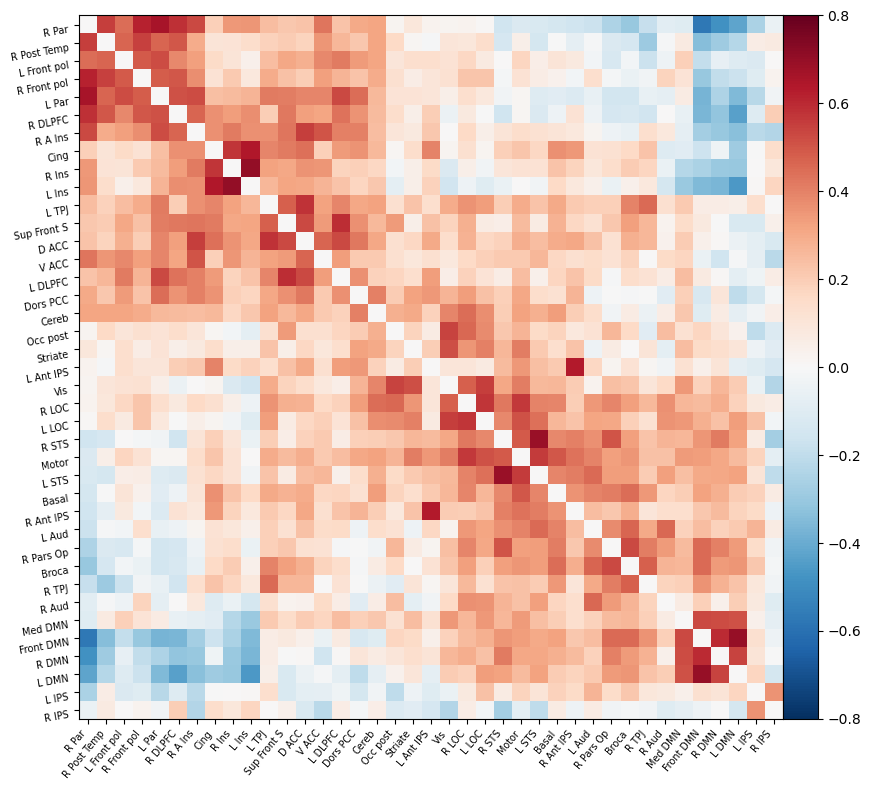

In [159]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([data_in_atlas])[0]

# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The matrix is reordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8, reorder=True,
                     #tri="lower"
                    )

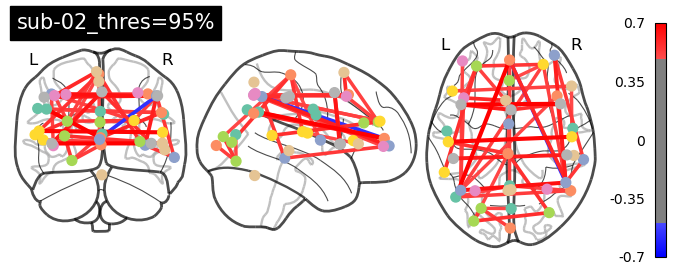

In [160]:
from nilearn.plotting import plot_connectome

coords = msdl_atlas.region_coords

# We threshold to keep only the 5% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="95%", colorbar=True,
                         title = "sub-02_thres=95%").savefig(figPath+"sub-02_conn_95.png")

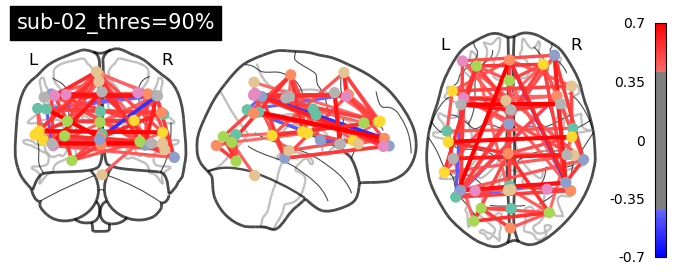

In [162]:
##Appendix, a 90% threshold for ADHD participant sub-02
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="90%", colorbar=True,
                         title = "sub-02_thres=90%").savefig(figPath+"_Appendix_sub-02_conn_90.png")

## Sub-03
Now we follow the same steps to analyse connectivity of a single control subject `sub-03`.

In [87]:
sub03_anat_r = os.path.expanduser("~/BHS2023_Project_ADHD/data/ds002424/sub-03/ses-T1/anat/sub-03_ses-T1_T1w.nii.gz")
sub03_anat_subj = deriv +"/sub-03/ses-T1/anat/sub-03_ses-T1_desc-preproc_T1w.nii.gz"
sub03_anat_MNI = deriv +"/sub-03/ses-T1/anat/sub-03_ses-T1_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz"

sub03_VLDr = os.path.expanduser("~/BHS2023_Project_ADHD/data/ds002424/sub-03/ses-T1/func/sub-03_ses-T1_task-VLD_bold.nii.gz")
sub03_VLD = deriv+"sub-03/ses-T1/func/sub-03_ses-T1_task-VLD_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"

c3 = pd.read_csv(deriv+"sub-03/ses-T1/func/sub-03_ses-T1_task-VLD_desc-confounds_timeseries.tsv", sep='\t')
sub03_confs = c3[['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
       'framewise_displacement', 'a_comp_cor_00', 'a_comp_cor_01',
       'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',
       'csf', 'white_matter']]

### Anatomical Images
**Raw data**

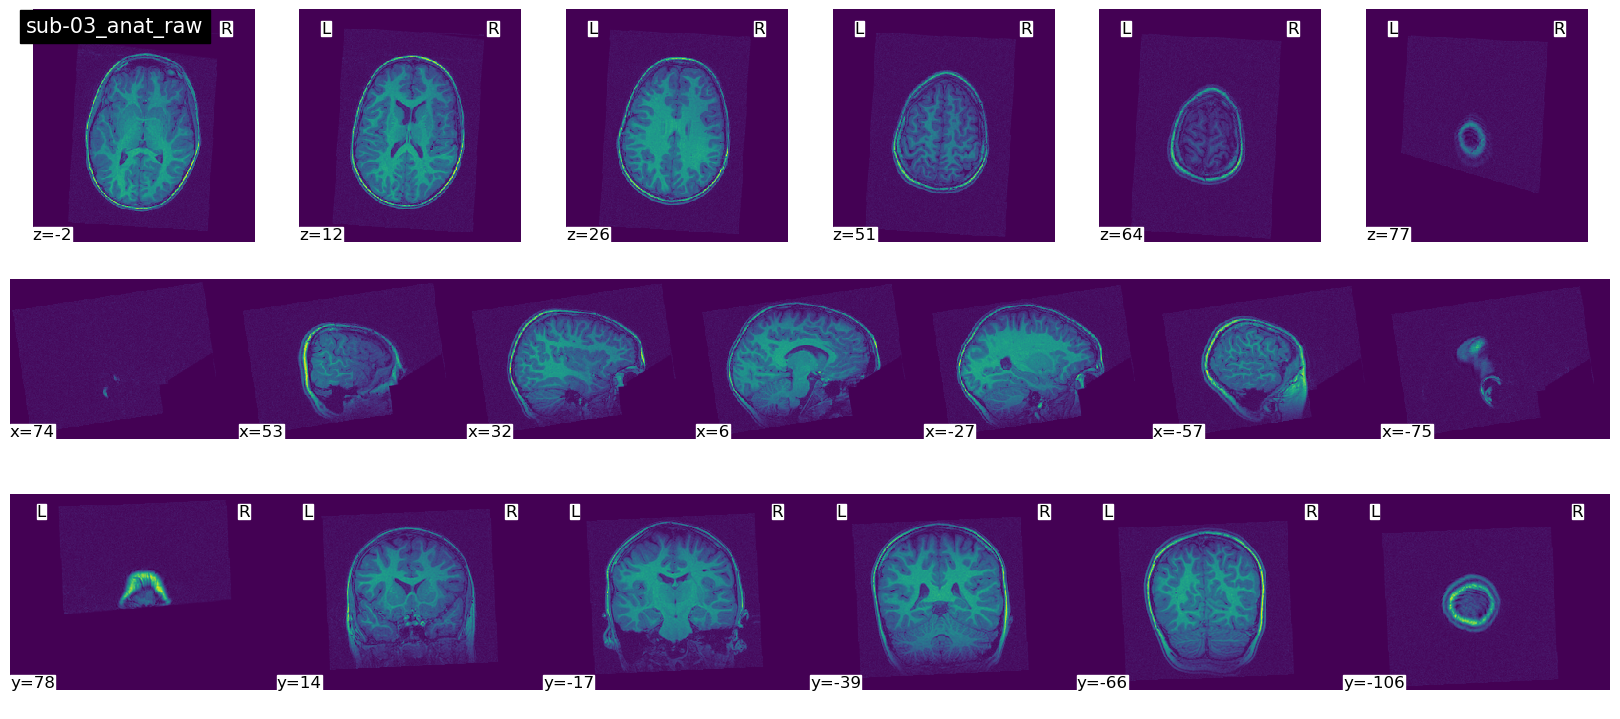

In [144]:
print(nib.load(sub03_anat_r).shape)
fig = plt.figure(figsize=(14,6))
plotting.plot_img(sub03_anat_r, display_mode="mosaic",
                  cut_coords=(7,6,6), figure=fig,
                  title = "sub-03_anat_raw").savefig(figPath+"sub-03_anat_raw_mosaic.png")

#plotting.view_img(sub03_anat)

**Preprocessed, subject space.**

(256, 256, 160)


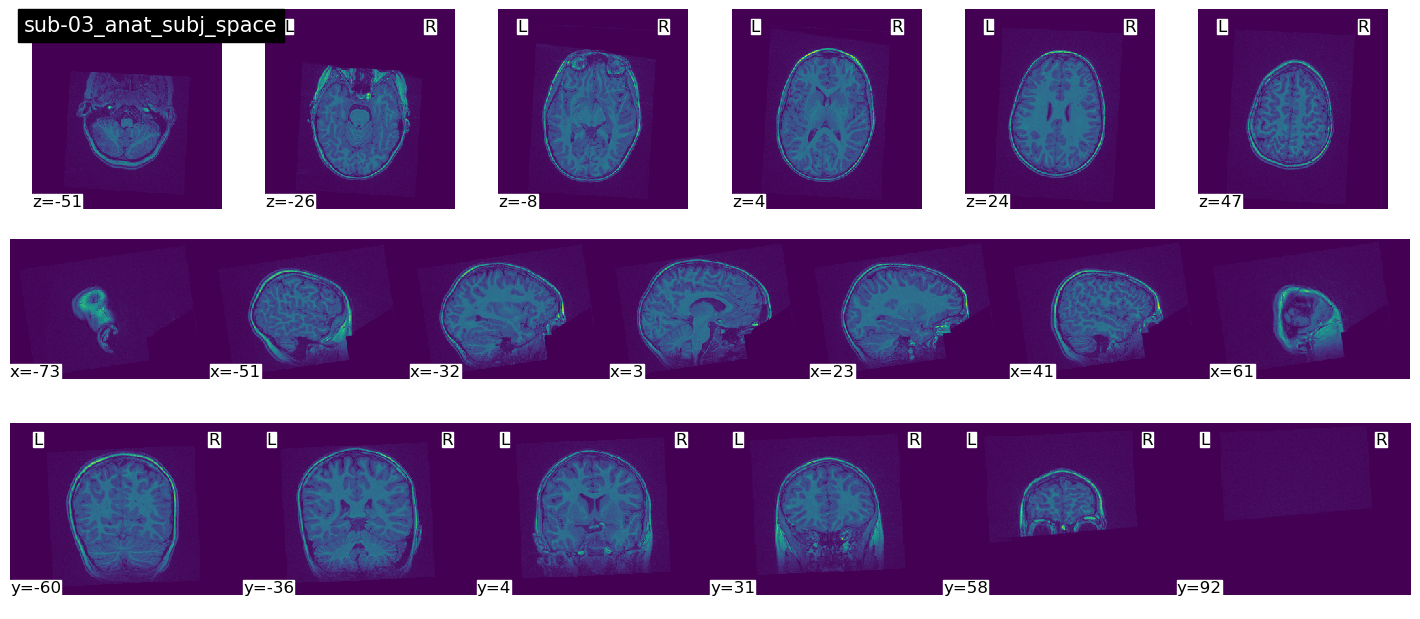

In [145]:
print(nib.load(sub03_anat_subj).shape)
fig = plt.figure(figsize=(14,6))
plotting.plot_img(sub03_anat_subj, display_mode="mosaic",
                  cut_coords=(7,6,6), figure=fig,
                  title="sub-03_anat_subj_space").savefig(figPath+"sub-03_anat_subj_space_mosaic.png")

#plotting.view_img(sub03_anat_subj)

**Normalization to MNI space.**

(97, 115, 97)


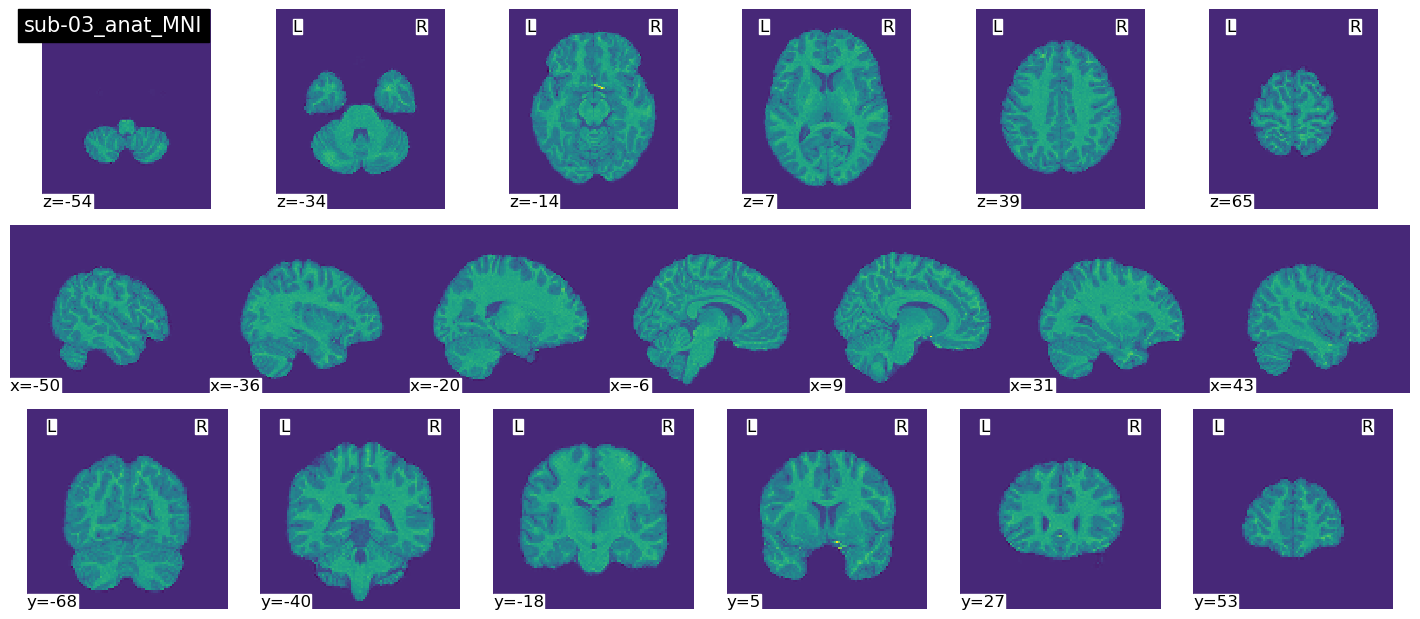

In [146]:
print(nib.load(sub03_anat_MNI).shape)
fig = plt.figure(figsize=(14,6))
plotting.plot_img(sub03_anat_MNI, display_mode="mosaic",
                  cut_coords=(7,6,6), figure=fig,
                  title="sub-03_anat_MNI").savefig(figPath+"sub-03_anat_MNI_mosaic.png")

#plotting.view_img(sub03_anat_MNI)

### Functional Images
**Raw data**

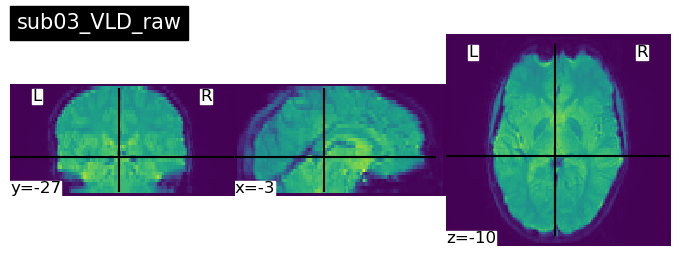

In [89]:
fmri_img_mean = mean_img(sub03_VLDr)
fmri_img_mean.shape
plotting.plot_img(fmri_img_mean,
                  cut_coords = (-3,-27,-10),
                  title="sub-03_VLD_raw")

#plotting.view_img(fmri_img_mean)


MNI space 

(97, 115, 97)

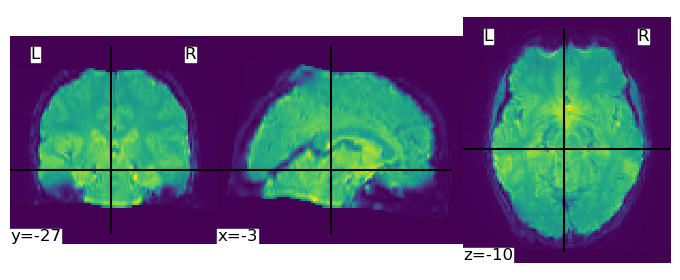

In [49]:
# Since our fmri_img is a 4D NiftiImage, we need to generate a 3D one.
fmri_img_mean = mean_img(sub03_VLD)
fmri_img_mean.shape
plotting.plot_img(fmri_img_mean,
                  cut_coords = (-3,-27,-10),
                  title="sub-03_VLD_prep_MNI")

#plotting.view_img(fmri_img_mean)

### Connectivity
#### Correlation matrix

In [152]:
#msdl_atlas = datasets.fetch_atlas_msdl()
#atlas_filepath = msdl_atlas.maps
atlas_masker = NiftiMapsMasker(maps_img=atlas_filepath, standardize=True)
data_in_atlas = atlas_masker.fit_transform(sub03_VLD, confounds=sub03_confs.fillna(0))
data_in_atlas.shape

(139, 39)

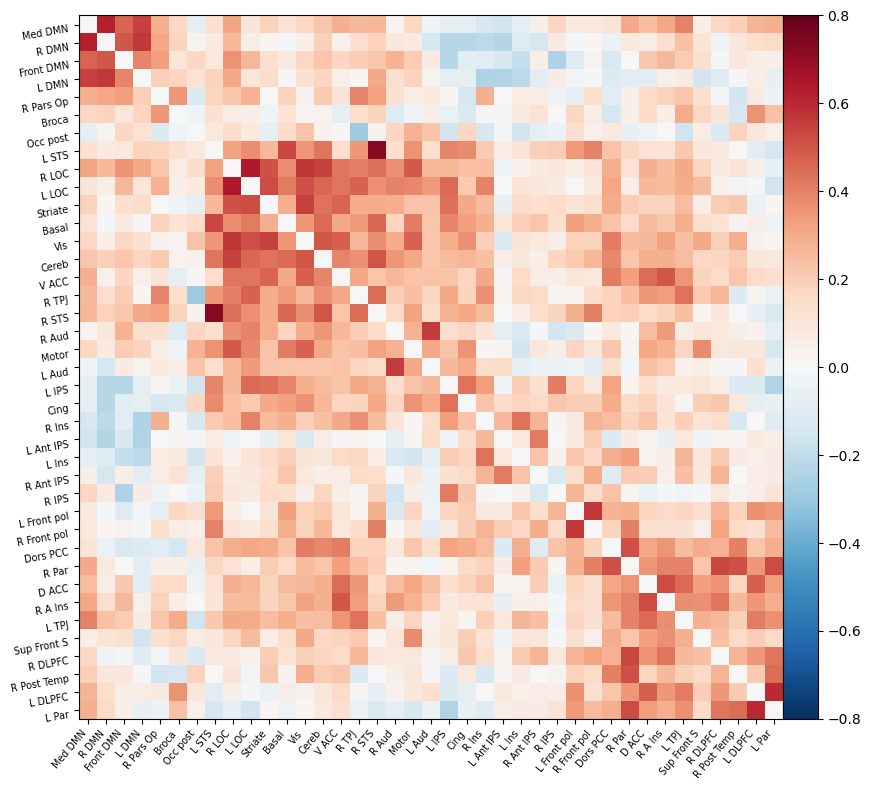

In [153]:
#from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([data_in_atlas])[0]

# Plot the correlation matrix
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The matrix is reordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8, reorder=True,
                    #tri = "lower"
                    )

#### Connectome

./result_figs/sub-02_anat_raw.png
./sub-02_anat_raw.png


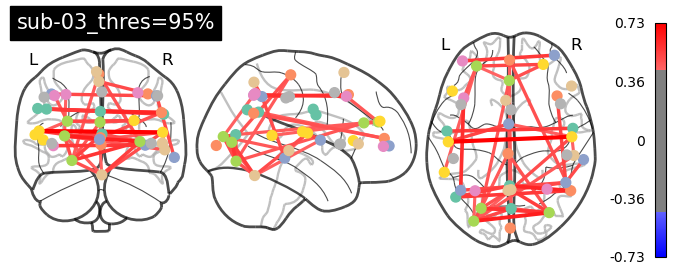

In [156]:
coords = msdl_atlas.region_coords

# We threshold to keep only the 5% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="95%", colorbar=True,
                         title = "sub-03_thres=95%",
                         #output_file=figPath+"sub-03_conn.png"
                        ).savefig(figPath+"sub-03_conn_95.png")                         
!find . -type f -name *.png

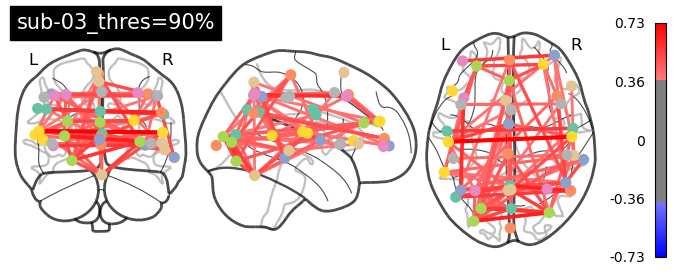

In [157]:
#Appendix control 
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="90%", colorbar=True,
                         title = "sub-03_thres=90%").savefig(figPath+"_Appendix_sub-03_conn_90.png")

# A Comparison b/t sub-02 and sub-03 connectivity
Comparisons:

For a simple connectivity analysis, we use `msdl` atlas to mask the imaging data first. A correlation matrix and a connectome were plotted then.

In [178]:
from nilearn import datasets
from nilearn.maskers import NiftiMapsMasker
msdl_atlas = datasets.fetch_atlas_msdl()
atlas_filepath = msdl_atlas.maps
atlas_masker = NiftiMapsMasker(maps_img=atlas_filepath, standardize=True)

data_in_atlas_s02 = atlas_masker.fit_transform(sub02_VLD, confounds=sub02_confs.fillna(0)) #first time point in framewise_displacement in NaN
data_in_atlas_s03 = atlas_masker.fit_transform(sub03_VLD, confounds=sub03_confs.fillna(0))

result_figs/corr_mtx.png


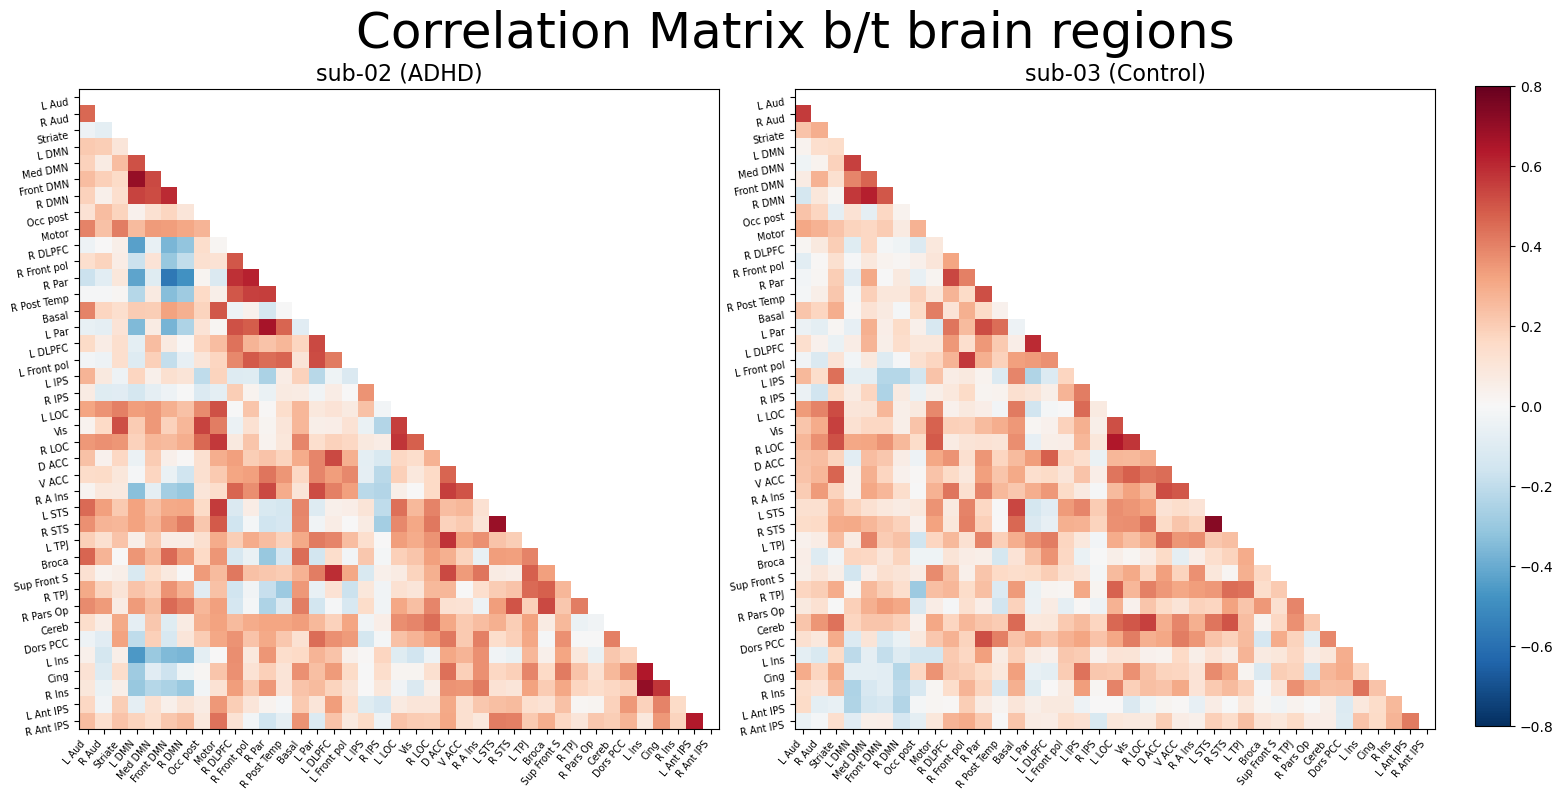

In [251]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix_02 = correlation_measure.fit_transform([data_in_atlas_s02])[0]
correlation_matrix_03 = correlation_measure.fit_transform([data_in_atlas_s03])[0]
fig, ax = plt.subplots(1,2, figsize = (16,8))
plotting.plot_matrix(correlation_matrix_02, #figure=fig,
                     labels=msdl_atlas.labels,
                     colorbar=False,
                     vmax=0.8, vmin=-0.8, 
                     #reorder=True,
                     axes=ax[0],
                     tri="lower"
                    )
ax[0].set_title("sub-02 (ADHD)", fontsize = 16)
a=plotting.plot_matrix(correlation_matrix_03, #figure=fig,
                     labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8,
                     #reorder=True,
                     colorbar=False,
                     axes=ax[1],
                     tri="lower"
                    )
ax[1].set_title("sub-03 (Control)", fontsize = 16)
fig.suptitle("Correlation_Matrix", fontsize = 36)
plt.tight_layout()
fig.subplots_adjust(right=0.9)
cbar_ax=fig.add_axes([0.925, 0.085, 0.022, .8])

fig.colorbar(a,cax=cbar_ax)

fig.suptitle("Correlation Matrix b/t brain regions", fontsize = 36)

fig.savefig("/mnt/c/Users/wcnon/Downloads/result_figs/corr_mtx.png")
fig.savefig(figPath+"/corr_mtx.png")
!ls result_figs/*mtx*